In [ ]:
import os, cv2, random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm
from random import shuffle 
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras import layers

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
%matplotlib inline 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [ ]:
!wget 'https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/5441/38425/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1592054713&Signature=FkYYF4xCp81grb%2BbzHi%2B7gshSJpILYFJD5jThZZPEMQtMnbfAg4KLFT0uNsi7040UMIV6oKk5AVz0lPU6N1d%2Frgo0RbV%2B2YxKxBaS%2BQjfYD6keSIKdrHIaAxYJ9uEurS6MprUcb9oefUTVd%2FJB9ebuRLm0gPAaT4wkM3Q39JirhhxJKneNKXXYtIyjfa1K0yhsGX9sblQeJvlfOmiq%2FCKukeTH0UlypQ489Gg%2BKI61O0DM0iREmOIWaqQqubeXWNeS4qncm2l5RaeYVl3mExkleCUOBKTwv9AyPrLJFivoESWUbR6jXz2bEmsYGMPi5jgtfUzubQvoS%2FuiFjjjICmA%3D%3D&response-content-disposition=attachment%3B+filename%3Ddogs-vs-cats-redux-kernels-edition.zip'

The name is too long, 544 chars total.
Trying to shorten...
New name is archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1592054713&Signature=FkYYF4xCp81grb+bzHi+7gshSJpILYFJD5jThZZPEMQtMnbfAg4KLFT0uNsi7040UMIV6oKk5AVz0lPU6N1d%2Frgo0RbV+2YxKxBaS+QjfYD6keSIKdrHIaAxYJ9uEurS6Mp.
--2020-06-10 16:08:52--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/5441/38425/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1592054713&Signature=FkYYF4xCp81grb%2BbzHi%2B7gshSJpILYFJD5jThZZPEMQtMnbfAg4KLFT0uNsi7040UMIV6oKk5AVz0lPU6N1d%2Frgo0RbV%2B2YxKxBaS%2BQjfYD6keSIKdrHIaAxYJ9uEurS6MprUcb9oefUTVd%2FJB9ebuRLm0gPAaT4wkM3Q39JirhhxJKneNKXXYtIyjfa1K0yhsGX9sblQeJvlfOmiq%2FCKukeTH0UlypQ489Gg%2BKI61O0DM0iREmOIWaqQqubeXWNeS4qncm2l5RaeYVl3mExkleCUOBKTwv9AyPrLJFivoESWUbR6jXz2bEmsYGMPi5jgtfUzubQvoS%2FuiFjjjICmA%3D%3D&response-content-disposition=attachment%3B+filename%3Ddogs-vs-cats-redux-kernels-edition.zip
Resolving storage.

In [ ]:
!wget 'https://storage.googleapis.com/kaggle-data-sets/6209%2F9900%2Fcompressed%2Fresnet50_weights_tf_dim_ordering_tf_kernels_notop.h5.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1592055077&Signature=ON8Q7tRagEIRVVdcy5Q0pA8o%2ByoTH3sFyC3c2Pk8VnvJS1EAl6XB8B%2BjBRCrExesKnyugqU8R1l2CSuf%2BW0dEeNLg85n0geqjrpTewxuMzq4vl9Ehvus3sHOE9RWQQd7o%2BMUWbWe2XS18UDnD7rnQTXeh2pmRAPDpHjNuvUo38OvOlgl9HmHfxxantazft2MS0swg61GvDq1Y8JVD2BxZpiAKN8rnEMpRlv8XDk3ekgZunA9aXbfk%2BBVKUZbRBP%2F%2FleSfv0aaxJy42eV2h6K0YFAek9eWerXMERBXFKD0U%2BZvm8RvVBZXCgMeWzo7k0rS2TquFv0zg9hdkkw8rfVFA%3D%3D'

The name is too long, 529 chars total.
Trying to shorten...
New name is 6209%2F9900%2Fcompressed%2Fresnet50_weights_tf_dim_ordering_tf_kernels_notop.h5.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1592055077&Signature=ON8Q7tRagEIRVVdcy5Q0pA8o+yoTH3sFyC3c2Pk8VnvJS1EAl6XB8B+.
--2020-06-10 16:09:01--  https://storage.googleapis.com/kaggle-data-sets/6209%2F9900%2Fcompressed%2Fresnet50_weights_tf_dim_ordering_tf_kernels_notop.h5.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1592055077&Signature=ON8Q7tRagEIRVVdcy5Q0pA8o%2ByoTH3sFyC3c2Pk8VnvJS1EAl6XB8B%2BjBRCrExesKnyugqU8R1l2CSuf%2BW0dEeNLg85n0geqjrpTewxuMzq4vl9Ehvus3sHOE9RWQQd7o%2BMUWbWe2XS18UDnD7rnQTXeh2pmRAPDpHjNuvUo38OvOlgl9HmHfxxantazft2MS0swg61GvDq1Y8JVD2BxZpiAKN8rnEMpRlv8XDk3ekgZunA9aXbfk%2BBVKUZbRBP%2F%2FleSfv0aaxJy42eV2h6K0YFAek9eWerXMERBXFKD0U%2BZvm8RvVBZXCgMeWzo7k0rS2TquFv0zg9hdkkw8rfVFA%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.170

In [ ]:
!unzip '/content/train.zip'
!unzip '/content/test.zip'

Streaming output truncated to the last 5000 lines.
  inflating: test/55.jpg             
  inflating: test/550.jpg            
  inflating: test/5500.jpg           
  inflating: test/5501.jpg           
  inflating: test/5502.jpg           
  inflating: test/5503.jpg           
  inflating: test/5504.jpg           
  inflating: test/5505.jpg           
  inflating: test/5506.jpg           
  inflating: test/5507.jpg           
  inflating: test/5508.jpg           
  inflating: test/5509.jpg           
  inflating: test/551.jpg            
  inflating: test/5510.jpg           
  inflating: test/5511.jpg           
  inflating: test/5512.jpg           
  inflating: test/5513.jpg           
  inflating: test/5514.jpg           
  inflating: test/5515.jpg           
  inflating: test/5516.jpg           
  inflating: test/5517.jpg           
  inflating: test/5518.jpg           
  inflating: test/5519.jpg           
  inflating: test/552.jpg            
  inflating: test/5520.jpg           

In [ ]:
TEST_SIZE = 0.5
RANDOM_STATE = 2020
BATCH_SIZE = 64
NO_EPOCHS = 20
NUM_CLASSES = 2
SAMPLE_SIZE = 20000
PATH = '/content'
TRAIN_FOLDER = './train/'
TEST_FOLDER =  './test/'
IMG_SIZE = 128
# RESNET_WEIGHTS_PATH = '/content/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:
train_image_list = os.listdir("./train/")[0:SAMPLE_SIZE]
test_image_list = os.listdir("./test/")

In [ ]:
def label_pet_image_one_hot_encoder(img):
    pet = img.split('.')[-3]
    if pet == 'cat': return [1,0]
    elif pet == 'dog': return [0,1]

In [ ]:
def process_data(data_image_list, DATA_FOLDER, isTrain=True):
    data_df = []
    for img in tqdm(data_image_list):
        path = os.path.join(DATA_FOLDER,img)
        if(isTrain):
            label = label_pet_image_one_hot_encoder(img)
        else:
            label = img.split('.')[0]
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        data_df.append([np.array(img),np.array(label)])
    shuffle(data_df)
    return data_df

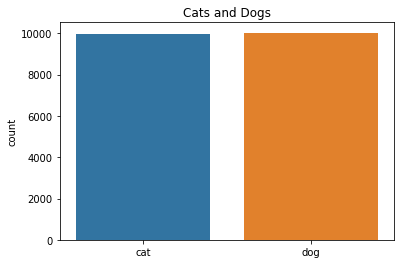

In [ ]:
def plot_image_list_count(data_image_list):
    labels = []
    for img in data_image_list:
        labels.append(img.split('.')[-3])
    sns.countplot(labels)
    plt.title('Cats and Dogs')
    
plot_image_list_count(train_image_list)

In [ ]:
train = process_data(train_image_list, TRAIN_FOLDER)
test = process_data(test_image_list, TEST_FOLDER, False)

100%|██████████| 12500/12500 [00:26<00:00, 476.30it/s]


In [ ]:
X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
y = np.array([i[1] for i in train])

In [ ]:
# pip install --upgrade keras keras-applications

In [ ]:

from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Model,Sequential, Input, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.applications import DenseNet121

def build_densenet():
    densenet = DenseNet121(weights='imagenet', include_top=False)

    input = Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x = Conv2D(3, (3, 3), padding='same')(input)
    
    x = densenet(x)
    
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    # multi output
    output = Dense(2,activation = 'softmax', name='root')(x)
 

    # model
    model = Model(input,output)
    
    optimizer = Adam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()
    return model
  
    

In [ ]:
from keras.applications import DenseNet121

model = DenseNet121()
print(model.summary())

Using TensorFlow backend.


33193984/33188688 [==============================] - 2s 0us/step
Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
_______________________

In [ ]:
model_densnet = build_densenet()
print(model_densnet)

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 128, 128, 3)       84        
_________________________________________________________________
densenet121 (Model)          multiple                  7037504   
_________________________________________________________________
global_average_pooling2d_5 ( (None, 1024)              0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_9 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               2624

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [ ]:
train_model = model_densnet.fit(X_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=(X_val, y_val))

Train on 10000 samples, validate on 10000 samples
Epoch 1/20
10000/10000 [==============================] - 106s 11ms/step - loss: 0.4709 - accuracy: 0.8114 - val_loss: 0.1265 - val_accuracy: 0.9527
Epoch 2/20
10000/10000 [==============================] - 66s 7ms/step - loss: 0.1455 - accuracy: 0.9441 - val_loss: 0.1516 - val_accuracy: 0.9402
Epoch 3/20
10000/10000 [==============================] - 66s 7ms/step - loss: 0.0928 - accuracy: 0.9640 - val_loss: 0.0956 - val_accuracy: 0.9645
Epoch 4/20
10000/10000 [==============================] - 66s 7ms/step - loss: 0.0588 - accuracy: 0.9771 - val_loss: 0.1238 - val_accuracy: 0.9577
Epoch 5/20
10000/10000 [==============================] - 66s 7ms/step - loss: 0.0353 - accuracy: 0.9867 - val_loss: 0.0855 - val_accuracy: 0.9718
Epoch 6/20
10000/10000 [==============================] - 66s 7ms/step - loss: 0.0251 - accuracy: 0.9907 - val_loss: 0.0957 - val_accuracy: 0.9695
Epoch 7/20
10000/10000 [==============================] - 66s 7ms/

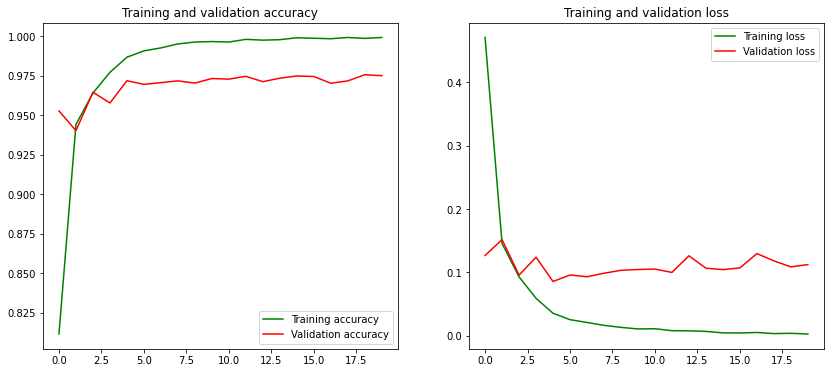

In [ ]:
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = range(len(acc))
    f, ax = plt.subplots(1,2, figsize=(14,6))
    ax[0].plot(epochs, acc, 'g', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'r', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].legend()
    ax[1].plot(epochs, loss, 'g', label='Training loss')
    ax[1].plot(epochs, val_loss, 'r', label='Validation loss')
    ax[1].set_title('Training and validation loss')
    ax[1].legend()
    plt.show()
plot_accuracy_and_loss(train_model)

In [ ]:
score = model.evaluate(X_val, y_val, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.221299409866333
Validation accuracy: 0.9553999900817871


In [ ]:
#get the predictions for the test data
predicted_classes = model.predict_classes(X_val)
#get the indices to be plotted
y_true = np.argmax(y_val,axis=1)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

In [ ]:
target_names = ["Class {}:".format(i) for i in range(NUM_CLASSES)]
print(classification_report(y_true, predicted_classes, target_names=target_names))


              precision    recall  f1-score   support

    Class 0:       0.95      0.96      0.96      4980
    Class 1:       0.96      0.95      0.96      5020

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [ ]:
# from keras import backend as K

# def sensitivity(y_true, y_pred):
#     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#     possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
#     return true_positives / (possible_positives + K.epsilon())

# def specificity(y_true, y_pred):
#     true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
#     possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
#     return true_negatives / (possible_negatives + K.epsilon())

In [ ]:
y_val

array([[0, 1],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [0, 1],
       [0, 1]])

In [ ]:
y_val = np.argmax(y_val, axis=1)

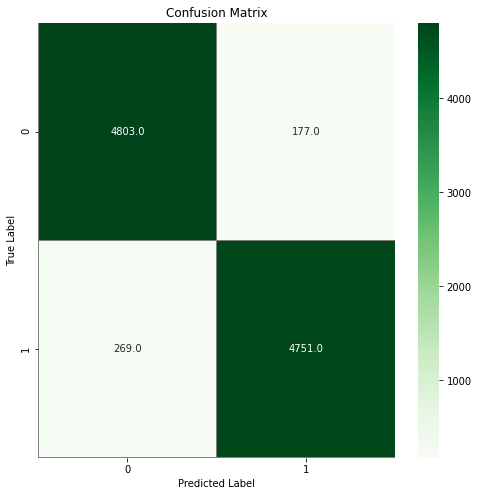

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Predict the values from the validation dataset

# compute the confusion matrix
confusion_mtx = confusion_matrix(y_val, predicted_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

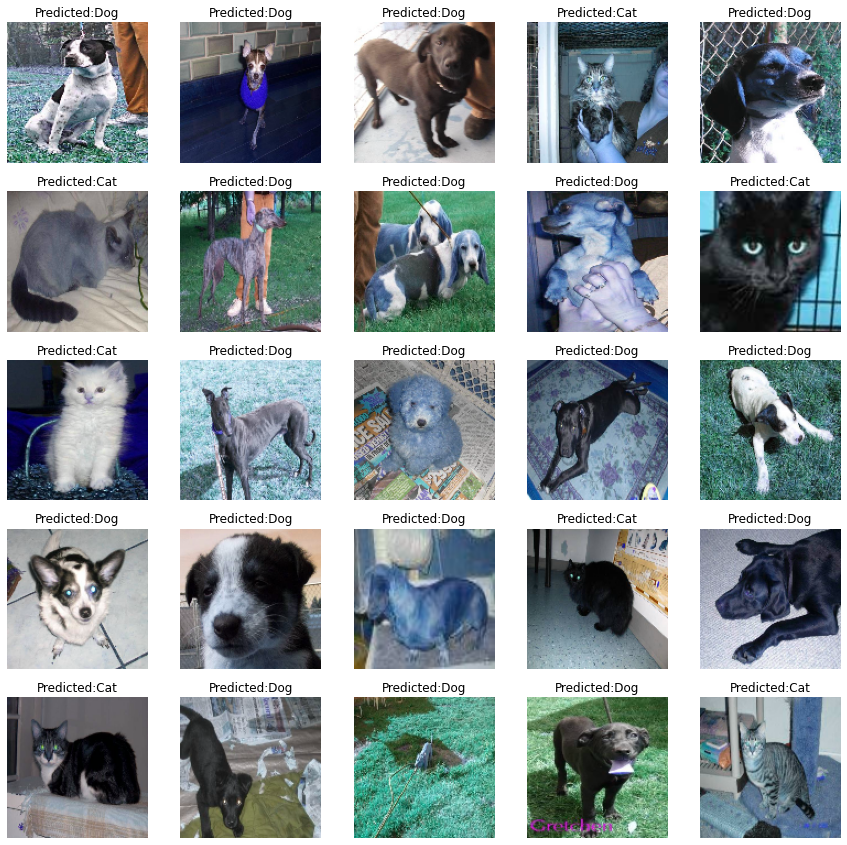

In [ ]:
f, ax = plt.subplots(5,5, figsize=(15,15))
for i,data in enumerate(test[:25]):
    img_num = data[1]
    img_data = data[0]
    orig = img_data
    data = img_data.reshape(-1,IMG_SIZE,IMG_SIZE,3)
    model_out = model.predict([data])[0]
    
    if np.argmax(model_out) == 1: 
        str_predicted='Dog'
    else: 
        str_predicted='Cat'
    ax[i//5, i%5].imshow(orig)
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_title("Predicted:{}".format(str_predicted))    
plt.show()